## Deep Neural Network Example-CNN

- Here we created every layer by row coding


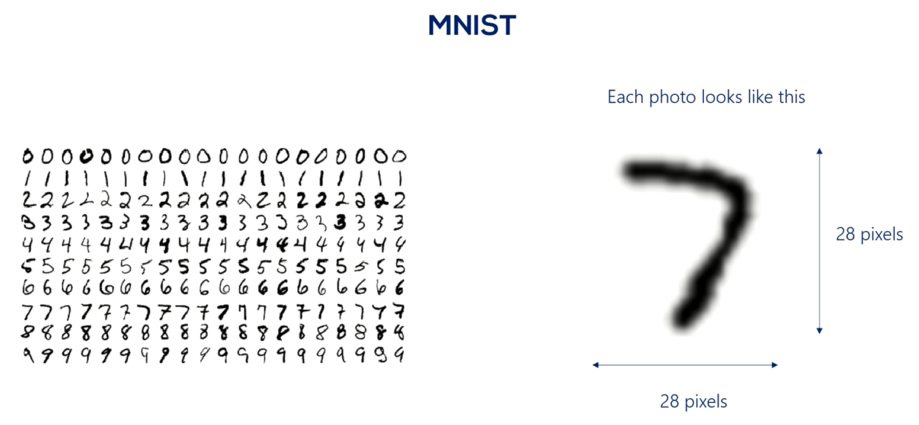
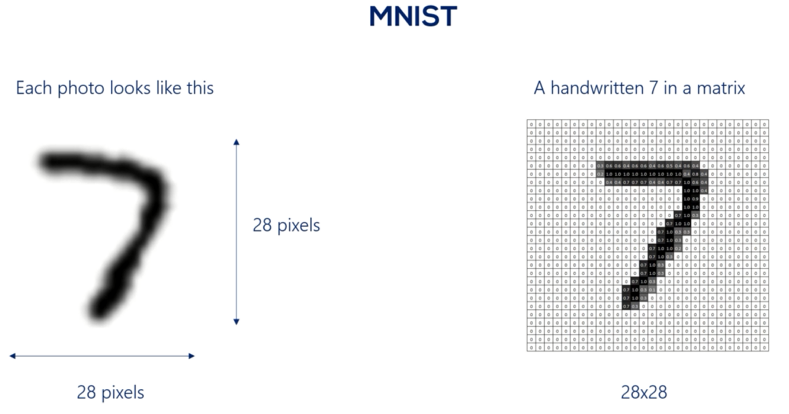
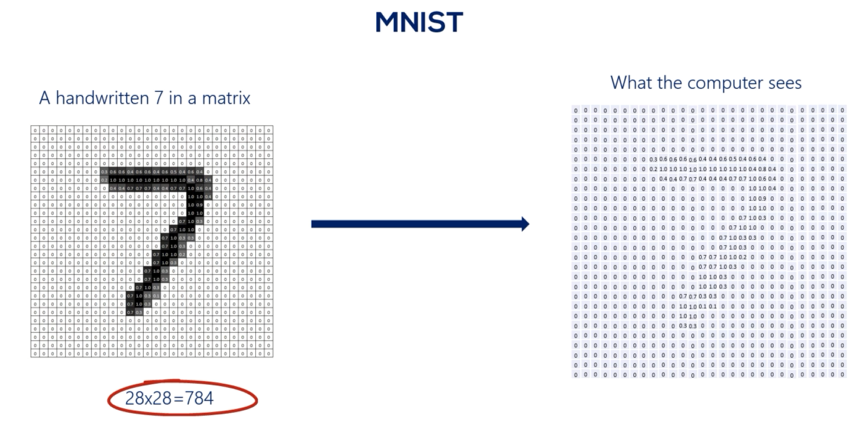
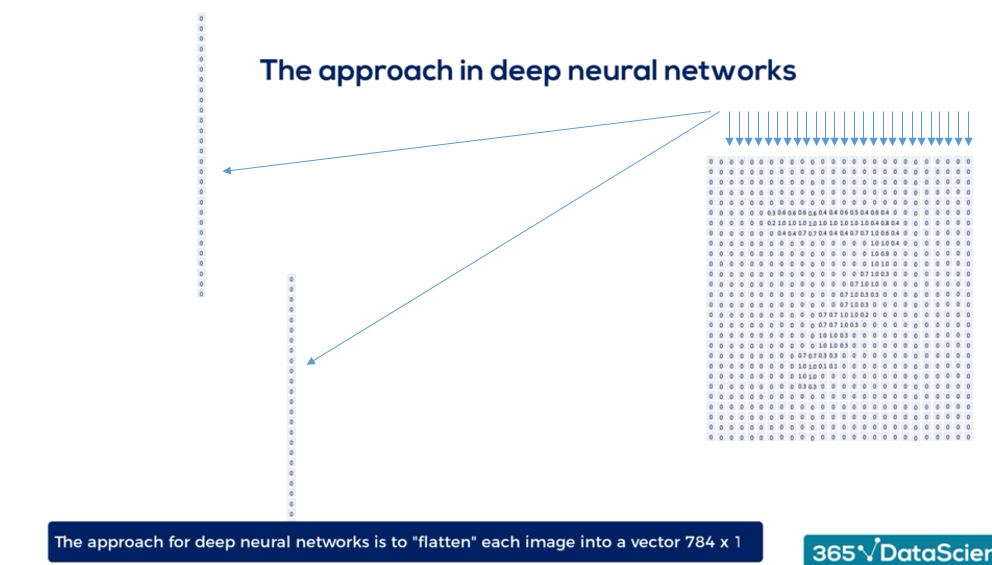
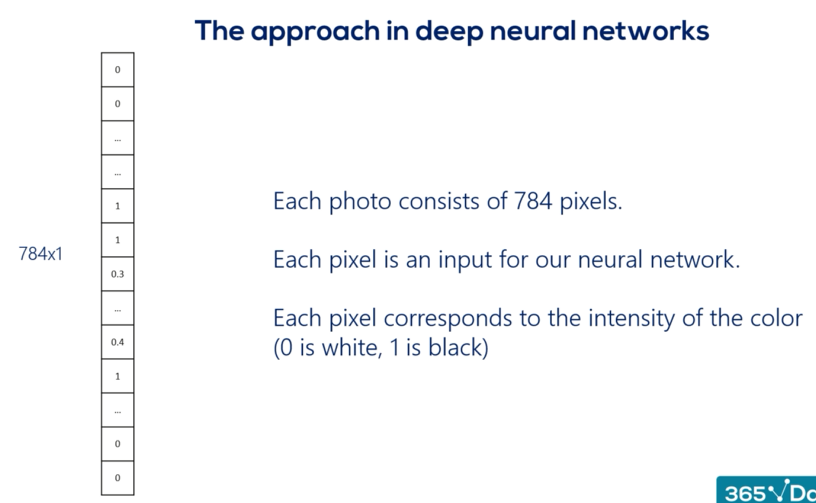
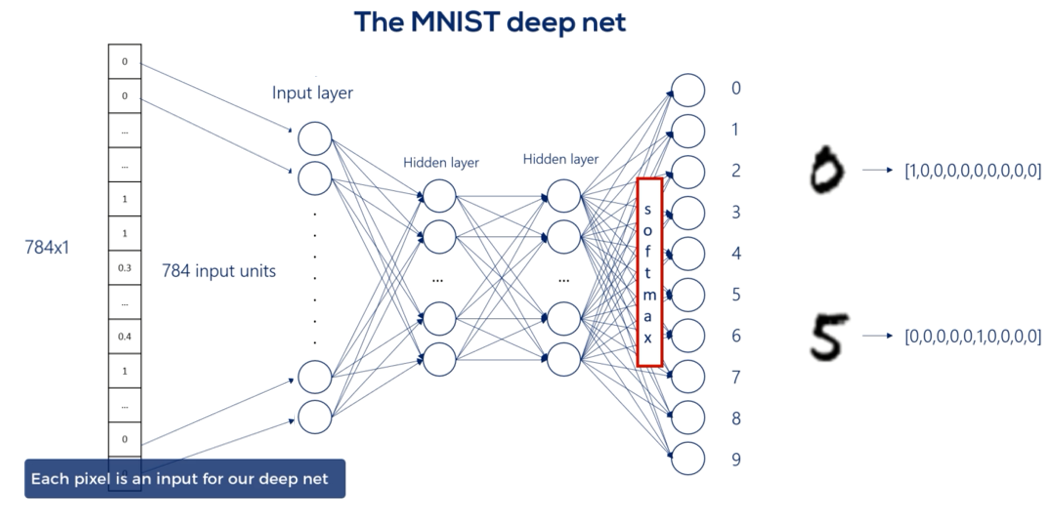
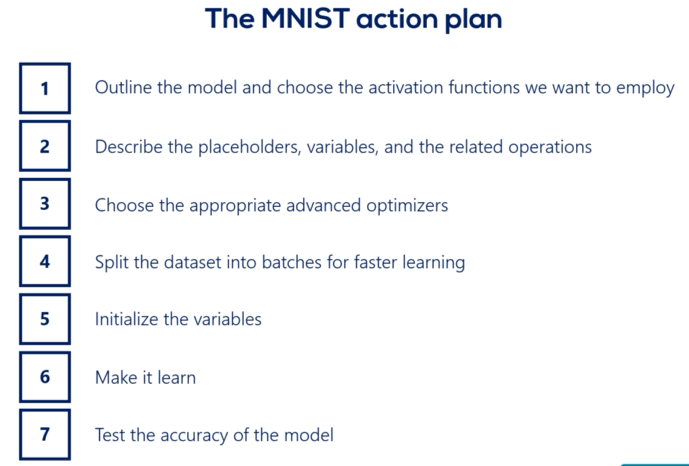


In [265]:
# import necessary libraries
import numpy as np

# tensorflow v2
import tensorflow as tf

# tensorflow v1
import tensorflow.compat.v1 as tfv1

# loading dataset from mnist
# mnist = tf.keras.datasets.mnist.load_data()
# (x_train, y_train), (x_test, y_test) = mnist

(train_images, train_labels), (
    test_images,
    test_labels,
) = tf.keras.datasets.mnist.load_data()

# train_images = train_images.reshape(
#    train_images.shape[0], 28, 28, 1).astype("float32")
# Normalize the images to [-1, 1]
# train_images = (train_images - 127.5) / 127.5

Outline the model


In [266]:
# input size is 28x28 = 784x1 vector
input_size = 784

# output sizw is 0-9 = 10
output_size = 10

# size of hidden layer = 50
hidden_layer_size = 50

# clears the memory of all variables left from previous run
tfv1.reset_default_graph()
tfv1.disable_eager_execution()

# placeholders for inputs and outputs
inputs = tfv1.placeholder(shape=[None, input_size], dtype=tf.float32)
targets = tfv1.placeholder(shape=[None, output_size], dtype=tf.float32)

For Input layer

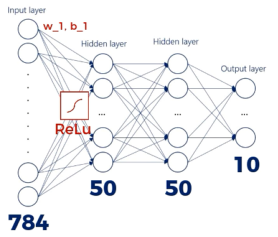

#### Shape of the weights and biases:

- W = k x m
- b = 1 x m

for the respective layer where k is prev m is nxt

We have 2 hidden layer so 3 weights vector


In [267]:
# 1. For Input Layer
# weights_1 = for input layer weights, size of the weights 'input_size' by 'hidden_layer_size'
weights_1 = tfv1.get_variable("weights_1", [input_size, hidden_layer_size])
# biases_1 = for input layer biases, size of the biases '1' by 'hidden_layer_size'
biases_1 = tfv1.get_variable("biases_1", [hidden_layer_size])
# output_1 = X.W + B
outputs_1 = tfv1.nn.xw_plus_b(inputs, weights_1, biases_1, name=None)
# apply non-linearity as relu activation function
outputs_1 = tfv1.nn.relu(outputs_1)

Hidden Layer-1

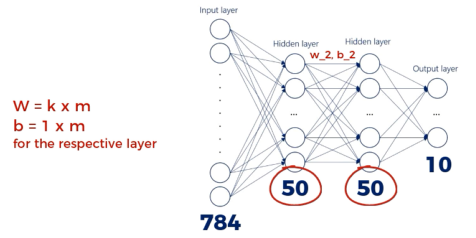


In [268]:
# 2. For Hidden Layer-1
# weights_2 = for hidden layer-1 weights, size of the weights 'hidden_layer_size' by 'hidden_layer_size'
weights_2 = tfv1.get_variable(
    "weights_2", [hidden_layer_size, hidden_layer_size])
# biases_2 = for hidden layer-1 biases, size of the biases '1' by 'hidden_layer_size'
biases_2 = tfv1.get_variable("biases_2", [hidden_layer_size])
# output_2 = X.W + B
outputs_2 = tfv1.nn.xw_plus_b(outputs_1, weights_2, biases_2, name=None)
# apply non-linearity as relu activation function
outputs_2 = tfv1.nn.relu(outputs_2)


Hidden Layer-2

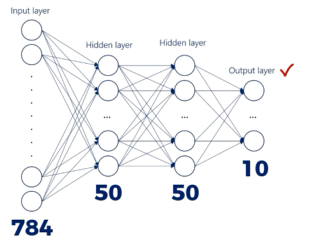

As this the final hidden layer,
we will use softmax activation function to figure out the probabilities :

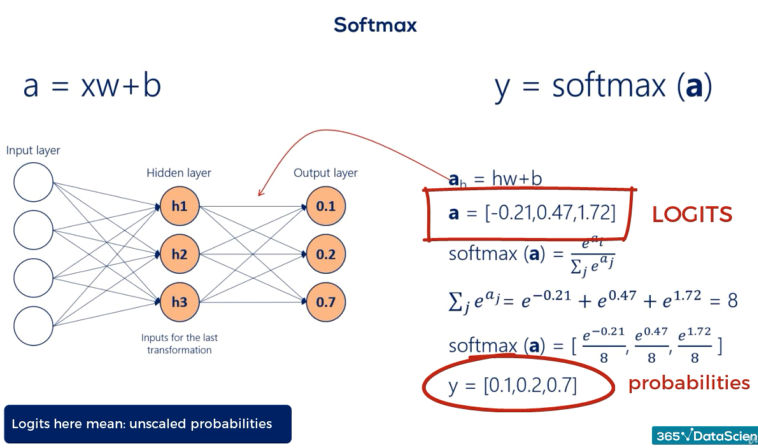


In [269]:
# 3. For Hidden Layer-2
# weights_3 = for hidden layer-2 weights, size of the weights 'hidden_layer_size' by 'output_size'
weights_3 = tfv1.get_variable("weights_3", [hidden_layer_size, output_size])
# biases_3 = for hidden layer-2 biases, size of the biases '1' by 'output_size'
biases_3 = tfv1.get_variable("biases_3", [output_size])
# output_3 = X.W + B
outputs = tfv1.nn.xw_plus_b(outputs_2, weights_3, biases_3, name=None)


Output Layer Loss


In [270]:
# apply softmax cross entropy function to find the loss
loss = tfv1.nn.softmax_cross_entropy_with_logits(
    logits=outputs, labels=targets)
# mean loss
mean_loss = tf.reduce_mean(loss)


Output Layer Optimization


In [271]:
# using Adaptive Momentum (or Adam) optimization function
optimize = tfv1.train.AdamOptimizer(learning_rate=0.001).minimize(mean_loss)

# output and target
out_equals_target = tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1))
print(out_equals_target)
# mean accuracy
accuracy = tf.reduce_mean(tf.cast(out_equals_target, tf.float32))
print(accuracy)


Tensor("Equal:0", shape=(None,), dtype=bool)
Tensor("Mean_1:0", shape=(), dtype=float32)


Prediction Accuracy

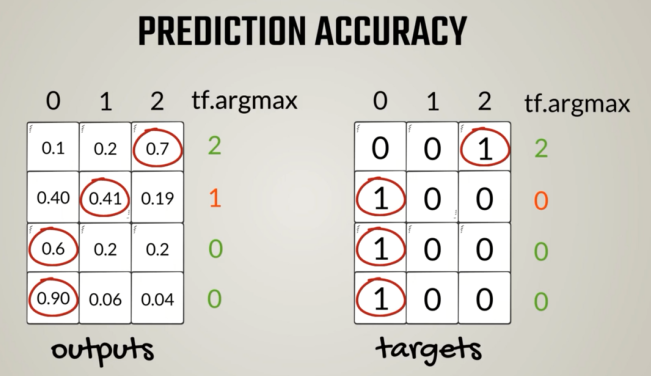

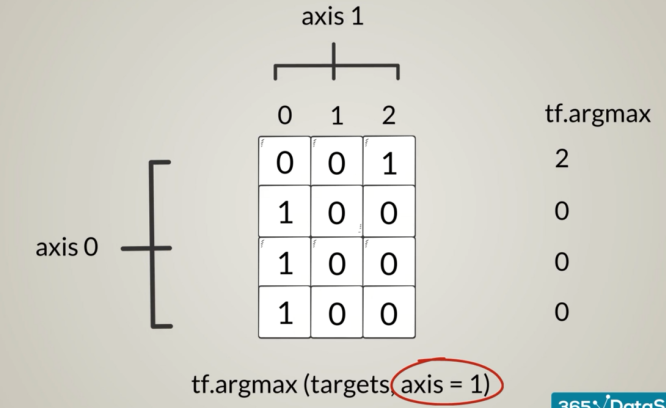


In [272]:
# Create a TensorFlow session
session = tfv1.Session()

# Initialize all variables
initializer = tfv1.global_variables_initializer()
session.run(initializer)

# Batch size = 1 -->  SGD
# Batch size = no. of samples -->  GD
batch_size = 100
batches_number = len(train_images) // batch_size
max_epochs = 15
prev_validation_loss = float("inf")  # Initialize with a large value

for epoch_counter in range(max_epochs):
    curr_epoch_loss = 0.0
    curr_batch = 0

    # Training loop
    for batch_counter in range(batches_number):
        input_batch = train_images[curr_batch : curr_batch + batch_size].reshape(
            -1, input_size
        )
        target_batch = np.zeros((len(input_batch), output_size))
        target_batch[
            np.arange(len(input_batch)),
            train_labels[curr_batch : curr_batch + batch_size],
        ] = 1

        # Run optimization and calculate mean loss
        _, batch_loss = session.run(
            [optimize, mean_loss],
            feed_dict={inputs: input_batch, targets: target_batch},
        )

        curr_batch = curr_batch + batch_size
        curr_epoch_loss = curr_epoch_loss + batch_loss

    curr_epoch_loss = curr_epoch_loss / batches_number

    train_accuracy = session.run(
        accuracy,
        feed_dict={
            inputs: train_images.reshape(-1, input_size),
            targets: np.eye(output_size)[train_labels],
        },
    )

    # Validation loop
    curr_vali_batch = 0
    vali_loss_accumulator = 0.0
    vali_accuracy_accumulator = 0.0
    vali_batches = len(test_images) // batch_size

    for _ in range(vali_batches):
        vali_input_batch = test_images[
            curr_vali_batch : curr_vali_batch + batch_size
        ].reshape(-1, input_size)
        vali_target_batch = np.zeros((len(vali_input_batch), output_size))
        vali_target_batch[
            np.arange(len(vali_input_batch)),
            test_labels[curr_vali_batch : curr_vali_batch + batch_size],
        ] = 1

        validation_loss, validation_accuracy = session.run(
            [mean_loss, accuracy],
            feed_dict={inputs: vali_input_batch, targets: vali_target_batch},
        )

        vali_loss_accumulator += validation_loss
        vali_accuracy_accumulator += validation_accuracy

        curr_vali_batch = (curr_vali_batch + batch_size) % len(test_images)
        # curr_vali_batch = curr_vali_batch + batch_size

    validation_loss_avg = vali_loss_accumulator / vali_batches
    validation_accuracy_avg = vali_accuracy_accumulator / vali_batches

    print(
        f"EPOCH {epoch_counter+1} Training loss: {curr_epoch_loss:.3f} Train accu.: {train_accuracy:.3f} Validation loss: {validation_loss_avg:.3f} Validation accu.: {validation_accuracy_avg:.3f} %"
    )

    if validation_loss_avg > prev_validation_loss:
        print("Validation loss increased.Please Stopping training!")
        # break
        # pass

    prev_validation_loss = validation_loss_avg

print("End of Training!")
session.close()

Epoch 1 Training loss: 3.117 Train accu.: 0.856 Validation loss: 0.731 Validation accu.: 0.850 %
Epoch 2 Training loss: 0.516 Train accu.: 0.886 Validation loss: 0.520 Validation accu.: 0.881 %
Epoch 3 Training loss: 0.364 Train accu.: 0.911 Validation loss: 0.393 Validation accu.: 0.905 %
Epoch 4 Training loss: 0.289 Train accu.: 0.919 Validation loss: 0.361 Validation accu.: 0.912 %
Epoch 5 Training loss: 0.246 Train accu.: 0.903 Validation loss: 0.436 Validation accu.: 0.897 %
Validation loss increased.Please Stopping training!
Epoch 6 Training loss: 0.226 Train accu.: 0.918 Validation loss: 0.392 Validation accu.: 0.910 %
Epoch 7 Training loss: 0.209 Train accu.: 0.925 Validation loss: 0.350 Validation accu.: 0.916 %
Epoch 8 Training loss: 0.191 Train accu.: 0.938 Validation loss: 0.299 Validation accu.: 0.930 %
Epoch 9 Training loss: 0.178 Train accu.: 0.933 Validation loss: 0.345 Validation accu.: 0.922 %
Validation loss increased.Please Stopping training!
Epoch 10 Training loss:

GPT Thik kore disilo


In [273]:
# Create a TensorFlow session
session = tfv1.Session()

# Initialize all variables
session.run(tfv1.global_variables_initializer())

# Define batch size and number of epochs
batch_size = 100
epochs = 15

# Training loop
for epoch in range(epochs):
    print(f"Epoch {epoch+1}/{epochs}")

    # Mini-batch training
    for batch_start in range(0, len(train_images), batch_size):
        input_batch = train_images[batch_start : batch_start + batch_size].reshape(
            -1, input_size
        )
        target_batch = np.zeros((len(input_batch), output_size))
        target_batch[
            np.arange(len(input_batch)),
            train_labels[batch_start : batch_start + batch_size],
        ] = 1

        # Run optimization and calculate mean loss
        _, batch_loss = session.run(
            [optimize, mean_loss],
            feed_dict={inputs: input_batch, targets: target_batch},
        )

        # currnt epoch loss
        curr_epoch_loss = curr_epoch_loss + batch_loss

        # Print batch loss
        print(f"Batch loss: {batch_loss:.4f}")

    # Calculate accuracy on the entire training set after each epoch
    train_accuracy = session.run(
        accuracy,
        feed_dict={
            inputs: train_images.reshape(-1, input_size),
            targets: np.eye(output_size)[train_labels],
        },
    )
    print(f"Training accuracy: {train_accuracy:.4f}")

# Calculate accuracy on the test set
test_accuracy = session.run(
    accuracy,
    feed_dict={
        inputs: test_images.reshape(-1, input_size),
        targets: np.eye(output_size)[test_labels],
    },
)
print(f"Validation accuracy: {test_accuracy:.4f}")

# Close the TensorFlow session
session.close()

Epoch 1/15


Batch loss: 90.8288
Batch loss: 65.9956
Batch loss: 45.6070
Batch loss: 46.6072
Batch loss: 31.8490
Batch loss: 31.5608
Batch loss: 29.7565
Batch loss: 23.6690
Batch loss: 22.1391
Batch loss: 20.5770
Batch loss: 13.7601
Batch loss: 17.2666
Batch loss: 18.4878
Batch loss: 16.6048
Batch loss: 9.4143
Batch loss: 10.3519
Batch loss: 10.7123
Batch loss: 10.4649
Batch loss: 11.4031
Batch loss: 9.3671
Batch loss: 8.9578
Batch loss: 9.6851
Batch loss: 10.3375
Batch loss: 6.7905
Batch loss: 7.2897
Batch loss: 7.6274
Batch loss: 6.7245
Batch loss: 5.4545
Batch loss: 4.4877
Batch loss: 7.2325
Batch loss: 9.0375
Batch loss: 4.8455
Batch loss: 4.8892
Batch loss: 5.3748
Batch loss: 4.9344
Batch loss: 5.4691
Batch loss: 4.4567
Batch loss: 7.1165
Batch loss: 3.4155
Batch loss: 3.1969
Batch loss: 5.1729
Batch loss: 4.8173
Batch loss: 2.6355
Batch loss: 4.1403
Batch loss: 3.7159
Batch loss: 4.0300
Batch loss: 6.1875
Batch loss: 4.7083
Batch loss: 3.3856
Batch loss: 3.9958
Batch loss: 3.3484
Batch loss: 